___



## This notebook is for your reference

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import important Librari

In [11]:

import types
import pandas as pd
from botocore.client import Config
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
#import ExtraTreesRegressor for model fit and prediction
from sklearn.ensemble import ExtraTreesRegressor
#import libraries for accuracy and error calculation
from sklearn.metrics import mean_squared_error, r2_score
#import libraries for model building and deployment
from watson_machine_learning_client import WatsonMachineLearningAPIClient
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3834f325d69c466eb7d56b49dc0e6838 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='t8loXO-qh_nq8hd2qOx3wesqqIcVSYfqy-nEDIqAwK67',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3834f325d69c466eb7d56b49dc0e6838.get_object(Bucket='lifeexpectancywithpython-donotdelete-pr-6dqfhru5xjsroy',Key='datasetsLifeExpectancyData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset= pd.read_csv(body)
dataset.head()


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [12]:
dataset.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [14]:
dataset.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [15]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
dataset.isnull().sum

<bound method DataFrame.sum of       Country   Year  Status  Life expectancy   Adult Mortality  \
0       False  False   False             False            False   
1       False  False   False             False            False   
2       False  False   False             False            False   
3       False  False   False             False            False   
4       False  False   False             False            False   
5       False  False   False             False            False   
6       False  False   False             False            False   
7       False  False   False             False            False   
8       False  False   False             False            False   
9       False  False   False             False            False   
10      False  False   False             False            False   
11      False  False   False             False            False   
12      False  False   False             False            False   
13      False  False   False   

In [17]:
dataset=dataset.fillna(dataset.mean())

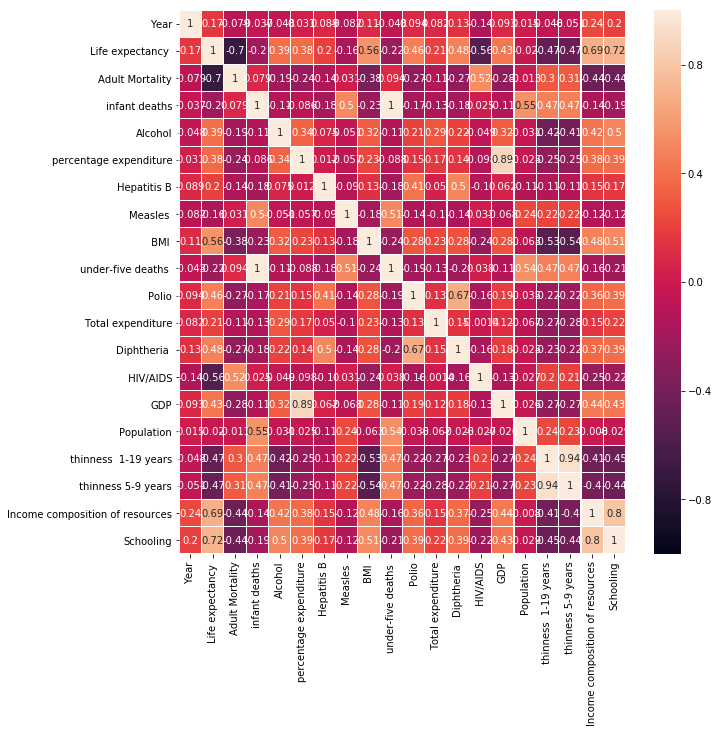

In [18]:
data=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data,vmin=-1,vmax=1,annot=True,linewidth=0.1)

# EDA

Let's create some simple plots to check out the data!

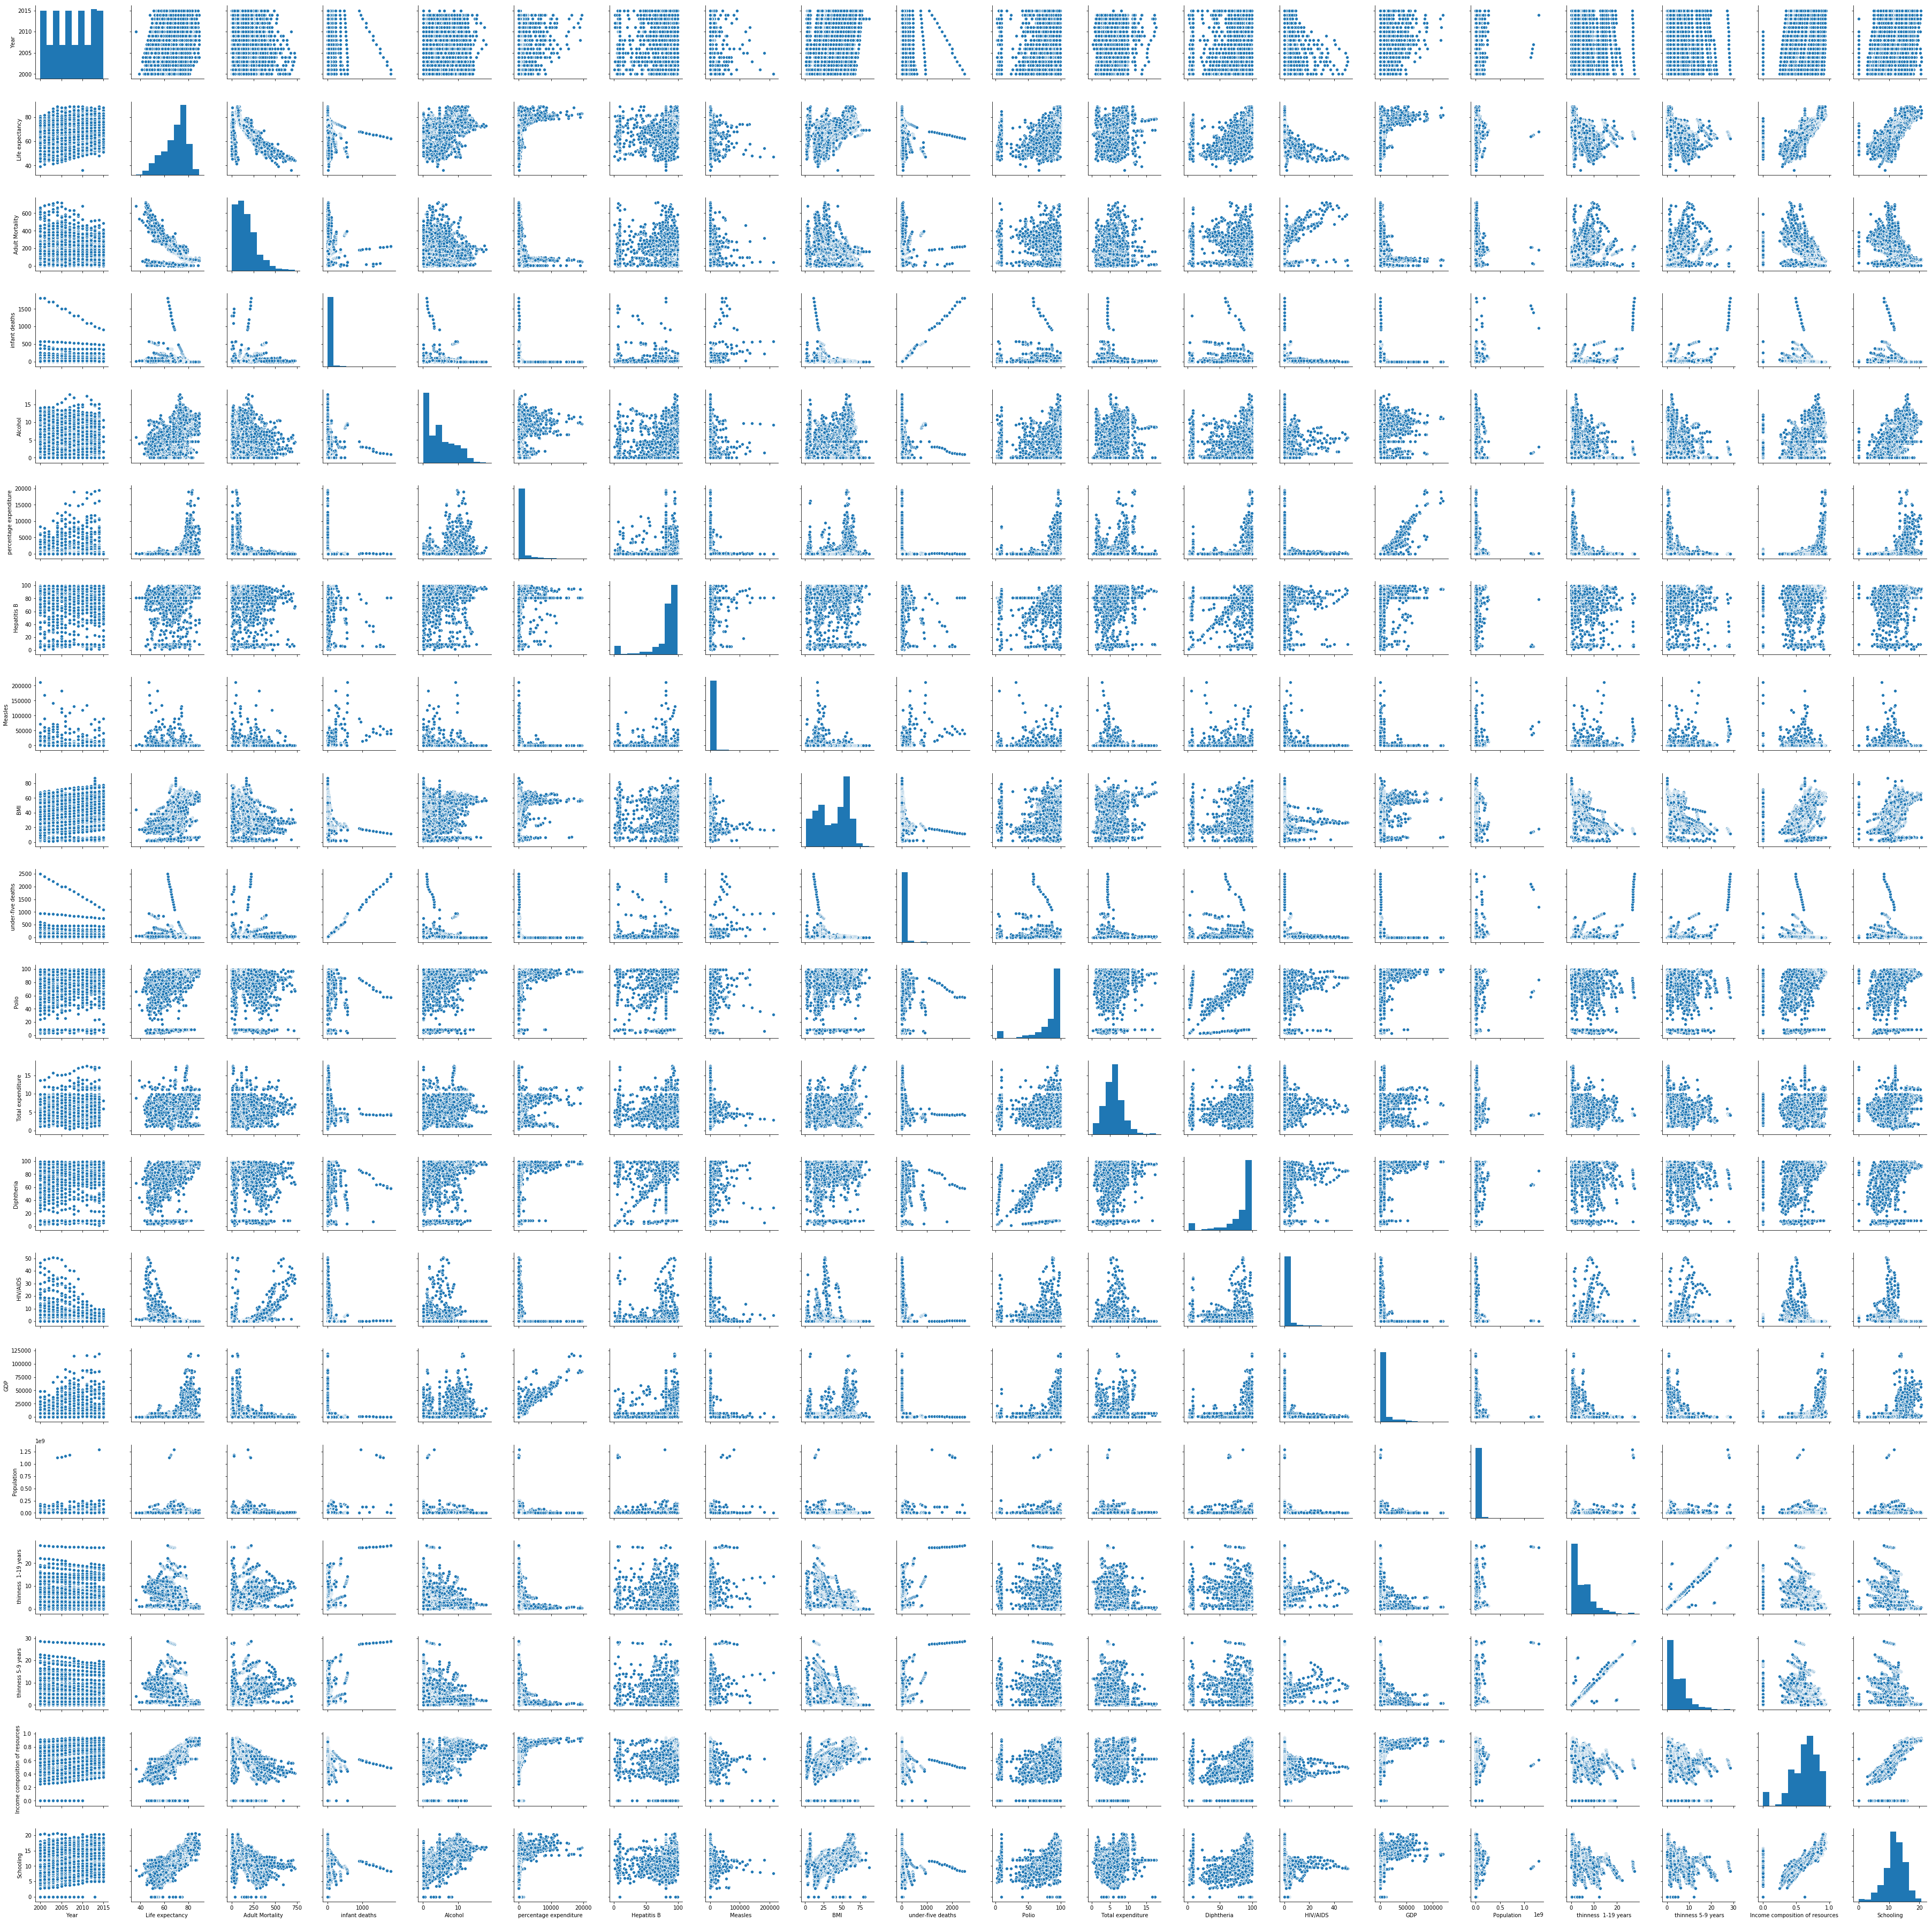

In [19]:
sns.pairplot(dataset)

In [20]:
y=dataset['Life expectancy ']
x=dataset[dataset.columns.difference(['Life expectancy '])]

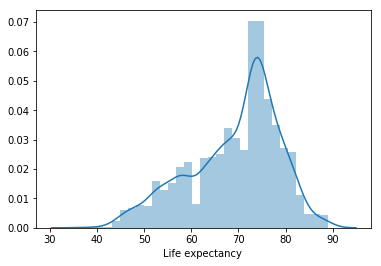

In [21]:
sns.distplot(dataset['Life expectancy '])

In [22]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [23]:
#SEE CATEGORICAL COLUMNS
dataset.select_dtypes(include=['object', 'bool']).columns


Index(['Country', 'Status'], dtype='object')

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [24]:
#IDENTIFY THE CATEGORICAL VALUES FOR COLUMNTRANSFORM
categorical_features = ['Country', 'Status']
categorical_feature_mask = x.dtypes==object
categorical_features = x.columns[categorical_feature_mask].tolist()
#DEFINE CATEGORICAL PIPELINE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [25]:
#IDENTIFY THE NUMERIC VALUES FOR COLUMNTRANSFORM
numeric_features = ['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI ', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria ', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years','Income composition of resources', 'Schooling']
numeric_feature_mask = x.dtypes!=object
numeric_features = x.columns[numeric_feature_mask].tolist()
#DEFINE NUMERIC PIPELINE
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

## Creating and Training the Model

In [29]:
#PIPELINNING USING COLUMNTRANSFORM
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [30]:
#DEFINE A REGRESSOR MODEL USING PIPELINE FUNCTION
ExtraTreeRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('ExtraTreeRegressor', ExtraTreesRegressor(n_estimators=100, random_state=0))
])


In [31]:
#TRAIN-TEST SPLIT
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)


## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [32]:
#FIT THE TRAINING MODEL
reg = ExtraTreeRegressor.fit(X_train, Y_train)

In [40]:
#PREDICT THE TEST DATA VALUE
test_pred=reg.predict(X_test)
print(test_pred)

[65.668      79.15       59.947      80.857      53.433      56.239
 69.906      72.71124932 72.928      73.909      76.206      69.907
 63.352      55.776      72.285      53.41       50.644      71.165
 74.36       58.479      74.815      63.995      63.338      72.581
 48.254      82.352      73.36624932 75.43       80.517      73.373
 54.803      78.13       51.786      52.098      85.285      68.677
 77.07       62.955      83.665      77.516      79.477      59.178
 77.619      58.765      78.479      72.748      72.235      50.854
 70.795      76.518      78.551      72.656      74.368      75.916
 75.457      81.802      75.073      60.011      48.38       54.803
 72.205      69.83       56.347      75.021      74.444      73.425
 77.633      72.41049863 53.464      82.352      48.784      71.544
 73.65       80.126      75.201      72.28       76.808      77.342
 45.217      52.456      82.73       57.716      63.587      81.114
 74.01       62.254      62.943      81.142     

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [41]:
#ESTIMATING ERROR
print('Mean squared error: ',mean_squared_error(Y_test, test_pred))
print('R2 score: ',r2_score(Y_test, test_pred)*100)


Mean squared error:  3.0224489378555615
R2 score:  96.74713278196019


In [42]:
wml_credentials={
 "apikey": "NGp8_pqMDNyazO2zq6zG3Ya6D1NVcpsS-3cSW3eNE76g",
 "instance_id": "8817f25a-2c21-4f95-84a7-ddad7dd70672",
  "url": "https://us-south.ml.cloud.ibm.com"
}
client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.service_instance.get_url())

https://us-south.ml.cloud.ibm.com


**Residual Histogram**

In [44]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Komal", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "SI05202000143@smartinternz.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy"}
#STORE THE MACHINE LEARNING MODEL
model_artifact=client.repository.store_model(ExtraTreeRegressor, meta_props=model_props)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [45]:
#GET MODEL UID
model_uid = client.repository.get_model_uid(model_artifact)
#DEPLOY THE MODEL
create_deployment = client.deployments.create(model_uid, name="LifeExpectancyPrediction")




#######################################################################################

Synchronous deployment creation for uid: 'aa53be95-2ab3-4a8f-98cf-7d0d4e899fba' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='84dcd7bc-d3da-4686-bd7a-d40117850061'
------------------------------------------------------------------------------------------------




In [46]:
#GET SCORING END-POINT URL
scoring_endpoint = client.deployments.get_scoring_url(create_deployment)
print(scoring_endpoint)


https://us-south.ml.cloud.ibm.com/v3/wml_instances/8817f25a-2c21-4f95-84a7-ddad7dd70672/deployments/84dcd7bc-d3da-4686-bd7a-d40117850061/online
